<a href="https://colab.research.google.com/github/sprashant19/Task/blob/main/Task_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Assignment5

Ground Cricket Chirps
In The Song of Insects (1948) by George W. Pierce, Pierce mechanically measured the frequency (the number of wing vibrations per second) of chirps (or pulses of sound) made by a striped ground cricket, at various ground temperatures. Since crickets are ectotherms (cold-blooded), the rate of their physiological processes and their overall metabolism are influenced by temperature. Consequently, there is reason to believe that temperature would have a profound effect on aspects of their behavior, such as chirp frequency.

In general, it was found that crickets did not sing at temperatures colder than 60º F. or warmer than 100º F.


Tasks

1.Find the linear regression equation for this data.

2.Chart the original data and the equation on the chart.


3.Find the equation's  R2  score (use the .score method) to determine whether the equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)

4.Extrapolate data: If the ground temperature reached 95, then at what approximate rate would you expect the crickets to be chirping?

5.Interpolate data: With a listening device, you discovered that on a particular morning the crickets were chirping at a rate of 18 chirps per second.
What was the approximate ground temperature that morning?

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model

In [ ]:
ground_cricket_data = {"Chirps_per_Second": [20.0, 16.0, 19.8, 18.4, 17.1, 15.5, 14.7,
                                         15.7, 15.4, 16.3, 15.0, 17.2, 16.0, 17.0,
                                         14.4],
                       "Ground_Temperature": [88.6, 71.6, 93.3, 84.3, 80.6, 75.2, 69.7,
                                              71.6, 69.4, 83.3, 79.6, 82.6, 80.6, 83.5,
                                              76.3]}
df = pd.DataFrame(ground_cricket_data)
df

,Chirps_per_Second,Ground_Temperature
0,20.0,88.6
1,16.0,71.6
2,19.8,93.3
3,18.4,84.3
4,17.1,80.6
5,15.5,75.2
6,14.7,69.7
7,15.7,71.6
8,15.4,69.4
9,16.3,83.3


In [ ]:
df.describe()

,Chirps_per_Second,Ground_Temperature
count,15.000000,15.000000
mean,16.566667,79.346667
std,1.712837,7.020467
min,14.400000,69.400000
25%,15.450000,73.400000
50%,16.000000,80.600000
75%,17.150000,83.400000
max,20.000000,93.300000


df.describe() provides the Mean,Standard Deviation,Minimum values,25th Quartile,50th Quartile,75th Qualrtile and Maximum value

Visualization




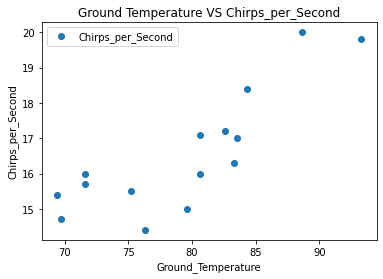

,Chirps_per_Second,Ground_Temperature
Chirps_per_Second,1.000000,0.832042
Ground_Temperature,0.832042,1.000000


In [ ]:
df.plot(x="Ground_Temperature",y="Chirps_per_Second",style='o')
plt.title("Ground Temperature VS Chirps_per_Second")
plt.xlabel("Ground_Temperature")
plt.ylabel("Chirps_per_Second")
plt.show()
df.corr()

There is linear relationship between Ground Temperature and Chirps/Second, so no transformation is required. We can plot model without calculating correlation.Also, there is a high correlation between the data, so there is no need for transformation

In [ ]:
df.Ground_Temperature.values  

array([88.6, 71.6, 93.3, 84.3, 80.6, 75.2, 69.7, 71.6, 69.4, 83.3, 79.6,
       82.6, 80.6, 83.5, 76.3])

Imported sklearn and it only works with arrays

Preparing the Data

Insights from the dataset:
Target----->Chirps/Second 

Feature---->Ground Temperature

In [ ]:
x=df.iloc[:,[1]].values                                                                                                                    #convert features as Arrays
y=df.iloc[:,0].values #convert target as Arrays 

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1)
x_train

array([[93.3],
       [79.6],
       [80.6],
       [71.6],
       [83.5],
       [88.6],
       [76.3],
       [83.3],
       [69.4],
       [80.6],
       [82.6],
       [75.2]])

In [ ]:
x_train.shape,x_test.shape

((12, 1), (3, 1))

Normalising/Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler() #intializing scaling
scaler.fit(x_train,y_train) #calculates values of mu and sigma
x_train_scaled=scaler.transform(x_train) #fit (mean,sd) and then transform the training data
x_test_scaled=scaler.transform(x_test) #only transform the test dataset

Model Training

In [ ]:
from sklearn.linear_model import LinearRegression
regressor=LinearRegression() #initializing the LinearRegression
regressor.fit(x_train,y_train)  #Learning happens-----> GD is done and we get the fianl values of m and c

LinearRegression()

In [ ]:

print(regressor.intercept_) #display the value of c

-0.3096122918821571


In [ ]:
print(regressor.coef_) #display the value of m

[0.21088052]


 Linear regression equation for the above data is:


 Predicted Chirps/second = 3.24*Ground_Temperature + 27.912

In [ ]:
y_pred=regressor.predict(x_test) #for features of test dataset, it gives final prediction
y_pred

array([17.46761536, 14.78943279, 14.3887598 ])

In [ ]:
df1=pd.DataFrame({'Actual':y_test,'Predicted':y_pred})
df1

,Actual,Predicted
0,18.4,17.467615
1,15.7,14.789433
2,14.7,14.388760


Evaluation Metrics

In [ ]:
from sklearn import metrics
print("R2 Score:",metrics.r2_score(y_test,y_pred))          

R2 Score: 0.7549575666351982


R2 score is 0.754, whcih shows it is not a good fit

Chart the original data and the equation on the chart.

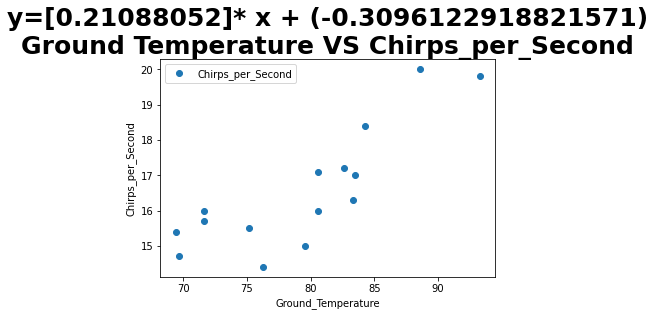

In [ ]:
df.plot(x="Ground_Temperature",y="Chirps_per_Second",style='o')
plt.title("Ground Temperature VS Chirps_per_Second")
plt.xlabel("Ground_Temperature")
plt.ylabel("Chirps_per_Second")
plt.title("y={0}* x + ({1})\nGround Temperature VS Chirps_per_Second".format(regressor.coef_,regressor.intercept_),fontweight='bold',size=25)
plt.show()

Extrapolate

In [ ]:
regressor.predict([[95]]) 

array([19.7240369])

Interpolate

The Linear Regression Equation is:

Chirps_per_second = regressor.coef_*Ground_temperature + regressor.intercept_

In [ ]:
#chirps per second is 18, storing in variable a and taking ground temperaure as b
a = 18
b = a-regressor.intercept_ /  regressor.coef_
b

array([19.46818822])

## Brain vs. Body Weight

In the file `brain_body.txt`, the average brain and body weight for a number of mammal species are recorded. Load this data into a Pandas data frame.

### Tasks

1. Find the linear regression equation for this data for brain weight to body weight.
2. Chart the original data and the equation on the chart.
3. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [ ]:
dataset = pd.read_fwf("/content/brain_body.txt")
dataset

,Brain,Body
0,3.385,44.5
1,0.480,15.5
2,1.350,8.1
3,465.000,423.0
4,36.330,119.5
...,...,...
57,160.000,169.0
58,0.900,2.6
59,1.620,11.4
60,0.104,2.5


In [ ]:
dataset.describe()

,Brain,Body
count,62.000000,62.000000
mean,198.789984,283.134194
std,899.158011,930.278942
min,0.005000,0.140000
25%,0.600000,4.250000
50%,3.342500,17.250000
75%,48.202500,166.000000
max,6654.000000,5712.000000


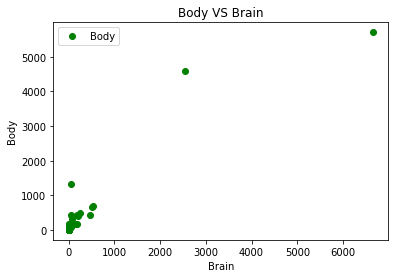

,Brain,Body
Brain,1.000000,0.934164
Body,0.934164,1.000000


In [ ]:
dataset.plot(x="Brain",y="Body",style="o",color="green")
plt.title("Body VS Brain")
plt.xlabel("Brain")
plt.ylabel("Body")
plt.show()
dataset.corr()


The above graph depicts that there is a Linear Relationship between Body Weight and Brain. Also there is a strong correlation.   

In [ ]:
dataset.Brain.values

array([3.385e+00, 4.800e-01, 1.350e+00, 4.650e+02, 3.633e+01, 2.766e+01,
       1.483e+01, 1.040e+00, 4.190e+00, 4.250e-01, 1.010e-01, 9.200e-01,
       1.000e+00, 5.000e-03, 6.000e-02, 3.500e+00, 2.000e+00, 1.700e+00,
       2.547e+03, 2.300e-02, 1.871e+02, 5.210e+02, 7.850e-01, 1.000e+01,
       3.300e+00, 2.000e-01, 1.410e+00, 5.290e+02, 2.070e+02, 8.500e+01,
       7.500e-01, 6.200e+01, 6.654e+03, 3.500e+00, 6.800e+00, 3.500e+01,
       4.050e+00, 1.200e-01, 2.300e-02, 1.000e-02, 1.400e+00, 2.500e+02,
       2.500e+00, 5.550e+01, 1.000e+02, 5.216e+01, 1.055e+01, 5.500e-01,
       6.000e+01, 3.600e+00, 4.288e+00, 2.800e-01, 7.500e-02, 1.220e-01,
       4.800e-02, 1.920e+02, 3.000e+00, 1.600e+02, 9.000e-01, 1.620e+00,
       1.040e-01, 4.235e+00])

Preparing the Data

In [ ]:
x=dataset.iloc[:,[0]].values      #converts feature as Arrays
y=dataset.Body.values        #convert target as Arrays

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1)

In [ ]:
x_train.shape

(49, 1)

Normalizing/Scaling the data

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()     #initializing Scaling
scaler.fit(x_test)          #calculates values of mu and sigma
x_train=scaler.transform(x_train)
x_test=scaler.transform(x_test) 

Model Training

In [ ]:
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()        #intializing the Linear Regression
regressor.fit(x_train,y_train)

LinearRegression()

In [ ]:
print("m = ",regressor.coef_)
print("c = ",regressor.intercept_)


m =  [141.28223008]
c =  172.39315704664997


In [ ]:
y_pred=regressor.predict(x_test)
y_pred

array([605.71075038, 104.43510099, 104.38506244, 107.53845362,
       105.66200784, 344.93290139, 104.46300711, 108.48918615,
       138.04272599, 200.59091855, 106.76862971, 104.3725528 ,
       105.71974464])

In [ ]:
data=pd.DataFrame({'Actual':y_test,'Predicted':y_pred})
data

,Actual,Predicted
0,655.00,605.710750
1,1.20,104.435101
2,0.40,104.385062
3,25.60,107.538454
4,8.10,105.662008
5,490.00,344.932901
6,2.50,104.463007
7,39.20,108.489186
8,56.00,138.042726
9,157.00,200.590919


Chart the Original Data and Equation 

y = [141.28223008]* x + 172.39315704664997


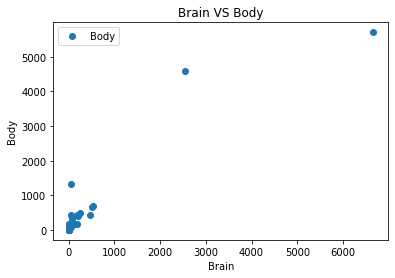

In [ ]:
dataset.plot(x="Brain",y="Body",style='o')
plt.title("Brain VS Body")
plt.xlabel("Brain")
plt.ylabel("Body")
print("y = {0}* x + {1}".format(regressor.coef_,regressor.intercept_))
plt.show()

Evaluation Metrics

In [ ]:
from sklearn import metrics
print("R2 Score",metrics.r2_score(y_test,y_pred))

R2 Score 0.7893783744895626


R2 Score is 0.78 which is less than 0.8, which is considered as a good model our model is not a good fit.

 Linear regression equation for this data for brain weight to body weight:

 Predicted Brain = 141.28223008*Body Weight +172.39315704664997

 

ASSIGNMENT 7

Salary Discrimination

The file salary.txt contains data for 52 tenure-track professors at a small Midwestern college. This data was used in legal proceedings in the 1980s about discrimination against women in salary.

The data in the file, by column:

1.Sex. 1 for female, 0 for male.

2.Rank. 1 for assistant professor, 2 for associate professor, 3 for full professor.

3.Year. Number of years in current rank.

4.Degree. Highest degree. 1 for doctorate, 0 for master's.

5.YSdeg. Years since highest degree was earned.

6.Salary. Salary/year in dollars.

Tasks

1.Find the linear regression equation for this data using columns 1-5 to column 6.

2.Find the selection of columns with the best  R2  score.

3.Report whether sex is a factor in salary.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model

In [ ]:
df = pd.read_fwf("salary.txt", header=None, 
                 names=["Sex", "Rank", "Year", "Degree", "YSdeg", "Salary"])
df

,Sex,Rank,Year,Degree,YSdeg,Salary
0,0,3,25,1,35,36350
1,0,3,13,1,22,35350
2,0,3,10,1,23,28200
3,1,3,7,1,27,26775
4,0,3,19,0,30,33696
5,0,3,16,1,21,28516
6,1,3,0,0,32,24900
7,0,3,16,1,18,31909
8,0,3,13,0,30,31850
9,0,3,13,0,31,32850


In [ ]:
df.describe()

,Sex,Rank,Year,Degree,YSdeg,Salary
count,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000
mean,0.269231,2.038462,7.480769,0.653846,16.115385,23797.653846
std,0.447888,0.862316,5.507536,0.480384,10.222340,5917.289154
min,0.000000,1.000000,0.000000,0.000000,1.000000,15000.000000
25%,0.000000,1.000000,3.000000,0.000000,6.750000,18246.750000
50%,0.000000,2.000000,7.000000,1.000000,15.500000,23719.000000
75%,1.000000,3.000000,11.000000,1.000000,23.250000,27258.500000
max,1.000000,3.000000,25.000000,1.000000,35.000000,38045.000000


In [ ]:
df.columns

Index(['Sex', 'Rank', 'Year', 'Degree', 'YSdeg', 'Salary'], dtype='object')

Exploratory Data Analysis

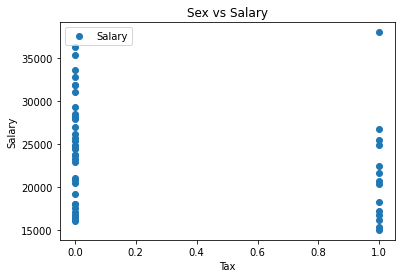

,Sex,Salary
Sex,1.000000,-0.252782
Salary,-0.252782,1.000000


In [ ]:
df.plot(x="Sex",y='Salary',style='o')
plt.title("Sex vs Salary")
plt.xlabel('Tax')
plt.ylabel('Salary')
plt.show()
df[["Sex","Salary"]].corr()

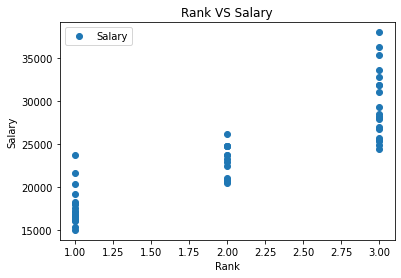

,Rank,Salary
Rank,1.000000,0.867488
Salary,0.867488,1.000000


In [ ]:
df.plot(x="Rank",y="Salary",style='o')
plt.title("Rank VS Salary")
plt.xlabel("Rank")
plt.ylabel("Salary")
plt.show()
df[['Rank','Salary']].corr()

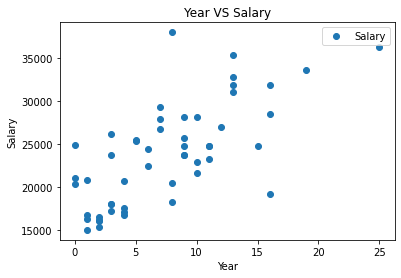

,Year,Salary
Year,1.000000,0.700669
Salary,0.700669,1.000000


In [ ]:
df.plot(x="Year",y="Salary",style='o')
plt.title("Year VS Salary")
plt.xlabel("Year")
plt.ylabel("Salary")
plt.show()
df[['Year','Salary']].corr()

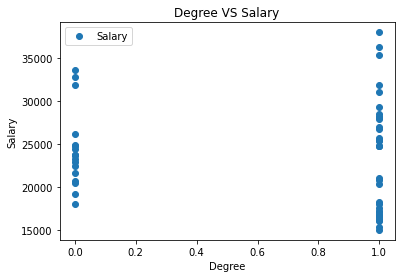

,Degree,Salary
Degree,1.000000,-0.069726
Salary,-0.069726,1.000000


In [ ]:
df.plot(x="Degree",y="Salary",style='o')
plt.title("Degree VS Salary")
plt.xlabel("Degree")
plt.ylabel("Salary")
plt.show()
df[['Degree','Salary']].corr()

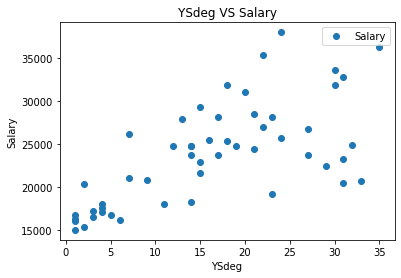

,YSdeg,Salary
YSdeg,1.000000,0.674854
Salary,0.674854,1.000000


In [ ]:
df.plot(x="YSdeg",y="Salary",style='o')
plt.title("YSdeg VS Salary")
plt.xlabel("YSdeg")
plt.ylabel("Salary")
plt.show()
df[['YSdeg','Salary']].corr()

Preparing the Data

In [ ]:
x=df[['Sex', 'Rank', 'Year', 'Degree', 'YSdeg']].values
y=df['Salary'].values

Splitting the Data 

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

Scaling or Normalising the data

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()     #Initializing Scaling
scaler.fit(x_train,y_train)     #Calculate values of mu and sigma
x_train_scaled=scaler.transform(x_train)    #fit (mean and  sd ) and then transform the trainig data
x_test_scaled=scaler.transform(x_test)  #only transform the test dataset

Model Training

In [ ]:
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(x_train_scaled,y_train)

LinearRegression()

In [ ]:
coeff_df=pd.DataFrame(regressor.coef_,['Sex', 'Rank', 'Year', 'Degree', 'YSdeg'],columns=['Coefficient'])
y_pred=regressor.predict(x_test_scaled)
coeff_df

,Coefficient
Sex,477.505951
Rank,4663.425905
Year,2426.269626
Degree,125.360914
YSdeg,-496.033054


In [ ]:
regressor.intercept_

23655.90243902439

In [ ]:
dataset=pd.DataFrame({'Actual':y_test,'Predicted':y_pred})
dataset

,Actual,Predicted
0,26182,21438.071793
1,17095,16907.551585
2,24750,26420.307923
3,22450,22765.454548
4,28200,29412.358800
5,21600,19807.126936
6,18075,16467.430709
7,23713,18364.913236
8,24800,24896.746490
9,33696,32772.357197


Evaluation Metrics

In [ ]:
from sklearn import metrics
print("Mean Absolute Error:",metrics.mean_absolute_error(y_test,y_pred))
print("Mean Squared Error:",metrics.mean_squared_error(y_test,y_pred))
print("R2 Score:",metrics.r2_score(y_test,y_pred))

Mean Absolute Error: 1928.4910245651467
Mean Squared Error: 6650141.0773443375
R2 Score: 0.662315861487556


R2 Score of 0.66 depicts that the model is a good model.

Feature Selection

Repeated Feature Elimination

In [ ]:
from sklearn.feature_selection import RFE
estimator=LinearRegression()
selector=RFE(estimator,n_features_to_select=1,step=1)
selector=selector.fit(x_train,y_train)
list(zip(['Sex', 'Rank', 'Year', 'Degree', 'YSdeg'],selector.support_))

[('Sex', False),
 ('Rank', True),
 ('Year', False),
 ('Degree', False),
 ('YSdeg', False)]

Linear Equation between the best feature and Target :

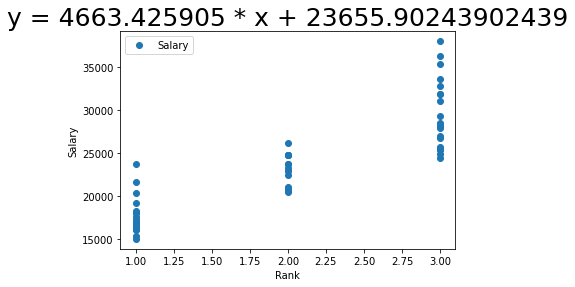

In [ ]:
df.plot(x="Rank",y="Salary",style='o')
plt.title("y = 4663.425905 * x + {0}".format(regressor.intercept_),size=25)
plt.xlabel("Rank")
plt.ylabel("Salary")
plt.show()

In [ ]:
df["Sex"]=df["Sex"].map({1:"Female",0:"Male"})
df

,Sex,Rank,Year,Degree,YSdeg,Salary
0,Male,3,25,1,35,36350
1,Male,3,13,1,22,35350
2,Male,3,10,1,23,28200
3,Female,3,7,1,27,26775
4,Male,3,19,0,30,33696
5,Male,3,16,1,21,28516
6,Female,3,0,0,32,24900
7,Male,3,16,1,18,31909
8,Male,3,13,0,30,31850
9,Male,3,13,0,31,32850


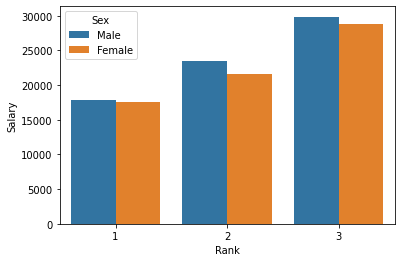

In [ ]:
import seaborn as sns
sns.barplot(x=df.Rank,y=df.Salary,hue=df.Sex,ci=None)


The above graph plotted between Salary and Rank depicts that Male are preferred more than Female in every rank.